# 📘 Linear Regression - Theory Notes

Linear Regression is one of the most fundamental algorithms in supervised machine learning. It is used for **predicting continuous outcomes** based on the input features.

---

## 🧠 What is Linear Regression?

Linear Regression tries to model the relationship between a dependent variable `y` and one or more independent variables `x` using a straight line.

- **Simple Linear Regression**: One input feature  
- **Multiple Linear Regression**: Multiple input features

---

## 🧮 Mathematical Equation

### 📍 Simple Linear Regression:

\[
y = mx + b
\]

- \( y \): predicted value  
- \( x \): input feature  
- \( m \): slope (weight)  
- \( b \): intercept (bias)

### 📍 Multiple Linear Regression:

\[
y = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b
\]

Or in vector form:

\[
\hat{y} = \mathbf{w}^T \mathbf{x} + b
\]

---

## 🎯 Objective

To find the best-fit line that minimizes the difference between actual and predicted values.

---

## 🧾 Cost Function

We use **Mean Squared Error (MSE)** to measure the model's performance:

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

Our goal is to minimize the MSE.

---

## 📉 Gradient Descent (Optimization)

To minimize the cost function, we update the weights using **Gradient Descent**:

\[
w := w - \alpha \cdot \frac{\partial \text{MSE}}{\partial w}
\]

\[
b := b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}
\]

- \( \alpha \): learning rate  
- \( \partial \): partial derivative

---

## ✅ Assumptions of Linear Regression

1. **Linearity**: Linear relationship between features and target
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of residuals
4. **Normality**: Residuals are normally distributed
5. **No multicollinearity**: Features are not highly correlated

---

## ⚖️ Advantages

- Easy to understand and implement
- Fast training
- Interpretable model

---

## ⚠️ Limitations

- Assumes linear relationships
- Sensitive to outliers
- Poor performance on complex, non-linear datasets

---

## 🔍 Applications

- Predicting house prices
- Forecasting stock prices
- Estimating costs or demand
- Analyzing trends in business and economics

---




# **Linear regression form scratch using numpy**

In [15]:
import numpy as np

**Data Perperation for linear regression model**

In [16]:
# Random seed for consistent results
np.random.seed(42)

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# print(f" X = {X}")

# print("----------------------------")
# print(y)

X.shape


(100, 1)

So, we created 100 points (x,y) that follow linear patter with some noise.

Now let's visualize the data point

**Visualization**

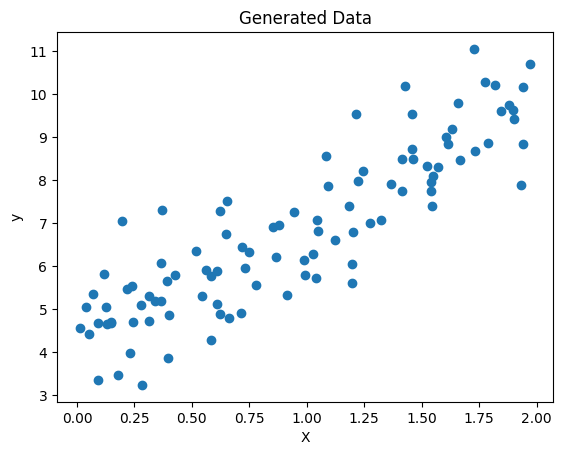

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()


# **We have two ways to find the best-fit line in linear regression:-**


*   Normal Equation (no learning)
*   Gradient Descent (iterative learning)


# **Normal Equation (no learning)**

In [20]:
# Add bias (1) column to X
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

# Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta found using Normal Equation:", theta_best)

Theta found using Normal Equation: [[4.21509616]
 [2.77011339]]


computed b and w directly!

The ***model*** learned **y ≈ 4 + 3x**

# **New vlaue prediction form our learnt model-**



*   **predicting** and **plotting** a line



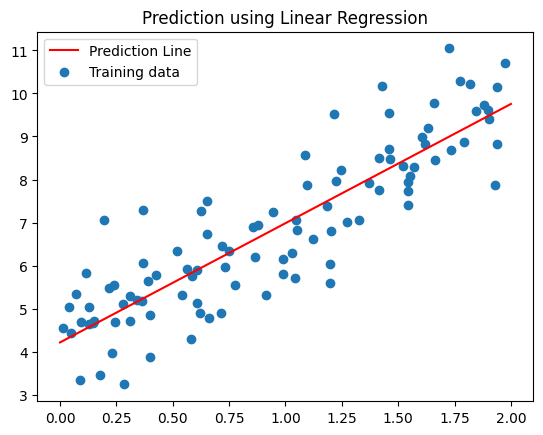

In [21]:
# Predict y for new x values
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

# Plot
plt.plot(X_new, y_predict, "r-", label="Prediction Line")
plt.scatter(X, y, label="Training data")
plt.legend()
plt.title("Prediction using Linear Regression")
plt.show()


# **Train with Gradient Descent**

In [22]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

# Random init
theta = np.random.randn(2, 1)

# Training loop
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

print("Theta from Gradient Descent:", theta)


Theta from Gradient Descent: [[4.21509616]
 [2.77011339]]


# **Visualize GD Prediction**

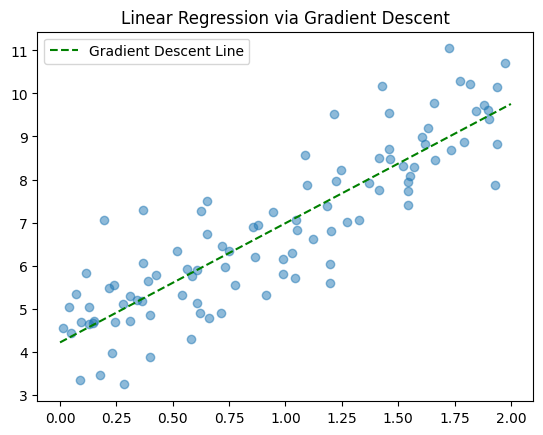

In [23]:
y_predict_gd = X_new_b.dot(theta)

plt.plot(X_new, y_predict_gd, "g--", label="Gradient Descent Line")
plt.scatter(X, y, alpha=0.5)
plt.legend()
plt.title("Linear Regression via Gradient Descent")
plt.show()


# **Model training using sklearn library**

In [25]:
from sklearn.linear_model import LinearRegression

#Create and train the model

model = LinearRegression()
model.fit(X, y)

# Get the line of best fit

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print(f"Equation: y = {slope}x + {intercept}")


Slope (m): [2.77011339]
Intercept (b): [4.21509616]
Equation: y = [2.77011339]x + [4.21509616]


# **Prediction**

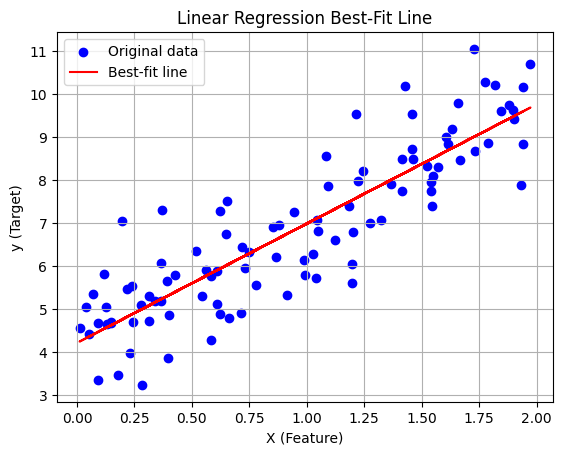

In [26]:
#Predict values for plotting the best-fit line

y_pred = model.predict(X)

#Plot

plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Best-fit line')
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Linear Regression Best-Fit Line")
plt.legend()
plt.grid(True)
plt.show()